### Lista 08

#### Aluno: Leodécio Braz
#### Matricula: 377594

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn import preprocessing,metrics
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation, neighbors, svm, naive_bayes

from matplotlib.colors import ListedColormap

import Perceptron,AdalineGD,AdalineSGD

/home/segundo/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
n_splits = 3

In [3]:
df = pd.read_csv('pima-indians-diabetes.csv')

y = df.values[:,8]
y = np.where(y == 0,-1,1)

In [4]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [5]:
def classification(model,X_,y_):
    accuracy = 0.0
    recall = 0.0
    f1 = 0.0
    auc = 0.0
    for train_index, test_index in kfold:
        X_train = X_[train_index]
        y_train = y_[train_index]
        X_test = X_[test_index]
        y_test = y_[test_index]
        
        #norm = preprocessing.MinMaxScaler().fit(X_train)
        #X_train_norm = norm.transform(X_train)
        #X_test_norm = norm.transform(X_test)
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        accuracy += metrics.accuracy_score(y_test,y_pred)
        #print(accuracy)
        #recall += metrics.recall_score(y_test,y_pred)
        #f1 += metrics.f1_score(y_test,y_pred)
   # print("accuracy: " + str((accuracy/n_splits)) + "\nrecall: "+ str((recall/n_splits)) +
   #       "\nf1: "+ str((f1/n_splits)))
    print("accuracy: " + str((accuracy/n_splits)))   

In [6]:
feature_cols =  ['A','B','C','D','E','F','G','H','I']
df.columns = feature_cols
df.head(5)

,A,B,C,D,E,F,G,H,I
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
df.corr()

,A,B,C,D,E,F,G,H,I
A,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
B,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
C,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
D,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
E,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
F,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
G,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
H,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
I,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [8]:
scale = preprocessing.StandardScaler().fit(df)
df_std = scale.transform(df)
df_std = pd.DataFrame(df_std)

In [9]:
feature_cols =  ['A','B','C','D','E','F','G','H','I']
df_std.columns = feature_cols

In [10]:
for i in feature_cols[0:len(feature_cols)-1]:
    print(i + ' -> I: ' + str(df_std[i].corr(df_std['I'])))

A -> I: 0.22108652807562904
B -> I: 0.4658559385379982
C -> I: 0.06488177904767505
D -> I: 0.0732649757662644
E -> I: 0.13198375600374374
F -> I: 0.2926954797181868
G -> I: 0.17324535270149696
H -> I: 0.2364174582978722


In [11]:
X_df = df_std[['B','F']]
X = X_df.values

In [12]:
ppn = Perceptron.Perceptron()
ad_gd = AdalineGD.AdalineGD()
ad_sgd = AdalineSGD.AdalineSGD()

# 2°

## Perceptron

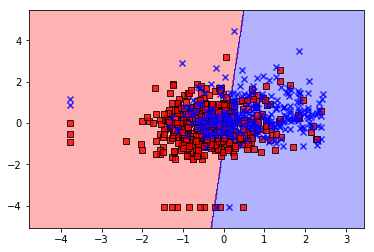

In [13]:
ppn.fit(X,y)
plot_decision_regions(X, y, classifier=ppn)

## AdalineGD

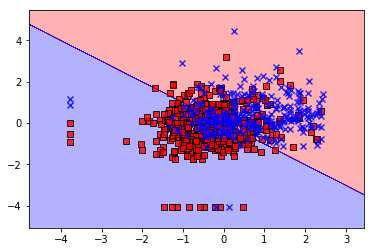

In [14]:
ad_gd.fit(X,y)
plot_decision_regions(X, y, classifier=ad_gd)

## AdalineSGD

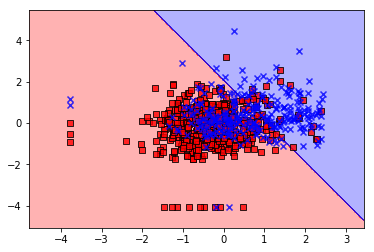

In [15]:
ad_sgd.fit(X,y)
plot_decision_regions(X, y, classifier=ad_sgd)

# 3°

In [16]:
kfold = cross_validation.StratifiedKFold(y,n_folds=n_splits)

In [17]:
X_ = df[['A','B','C','D','E','F','G','H']]
X = X_.values 

In [18]:
#Perceptron
ppn = Perceptron.Perceptron()
classification(ppn,X,y)

accuracy: 0.6583946078431372


In [19]:
#Adaline GD
ad_gd = AdalineGD.AdalineGD()
classification(ad_gd,X,y)

accuracy: 0.6518892973856208


/home/segundo/workspaceML/bibliotecas/AdalineGD.py:62: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
/home/segundo/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


In [20]:
#AdalineSGD
ad_sgd = AdalineSGD.AdalineSGD()
classification(ad_sgd,X,y)

/home/segundo/workspaceML/bibliotecas/AdalineSGD.py:91: RuntimeWarning: overflow encountered in double_scalars
  cost = 0.5 * error**2
/home/segundo/workspaceML/bibliotecas/AdalineSGD.py:104: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
/home/segundo/workspaceML/bibliotecas/AdalineSGD.py:89: RuntimeWarning: invalid value encountered in add
  self.w_[1:] += self.eta * xi.dot(error)


accuracy: 0.6518892973856208


In [21]:
#knn
knn = neighbors.KNeighborsClassifier()
classification(knn,X,y)

accuracy: 0.7157679738562092


In [22]:
#svm 
svc = svm.SVC()
classification(svc,X,y)

accuracy: 0.6518892973856208


In [23]:
#Naive Bayes
nb = naive_bayes.GaussianNB()
classification(nb,X,y)

accuracy: 0.7445108251633986


# 4°

O <b>Adaline com Gradiente Descendente em Batch</b> percorre todo o dataset para atualizar os pesos, atualiza ao final de cada epoch. <br />
O <b>Adaline com Gradiente Descendente Estocástico</b> atualizar os pesos para cada linha do dataset.